In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

import pandas as pd
data = pd.read_csv(r'D:\research project\Hyperspectral_data_millets_11_varieties.csv')

X = data.drop(columns=['Samples', 'Carbohydrate'])  
y = data['Carbohydrate'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_model.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"R2 Score: {r2_ridge}")

comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_ridge})
print(comparison_df)


Mean Squared Error (MSE): 2.0319677737321182
R2 Score: 0.8979206865669462
     Actual  Predicted
0     73.73  70.886307
1     73.73  71.847322
2     73.73  72.065469
3     71.92  71.925717
4     67.41  67.840448
..      ...        ...
259   67.81  68.965126
260   67.81  68.604345
261   71.52  72.627796
262   70.92  70.012673
263   69.84  69.617733

[264 rows x 2 columns]


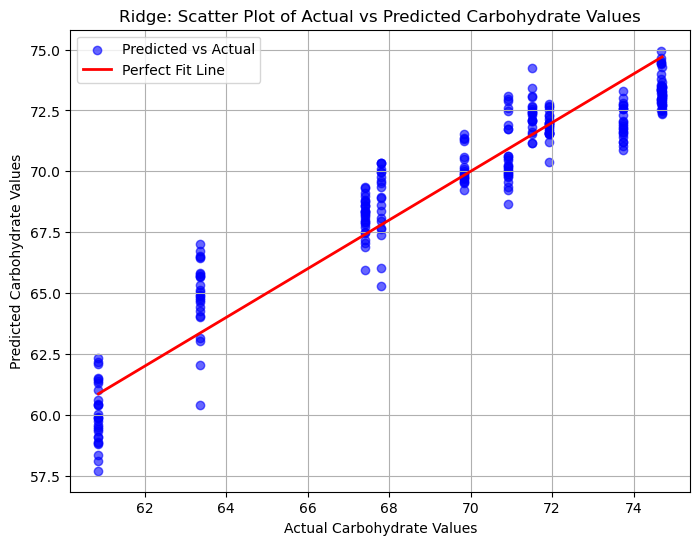

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', label='Predicted vs Actual', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Fit Line')
plt.xlabel('Actual Carbohydrate Values')
plt.ylabel('Predicted Carbohydrate Values')
plt.title('Ridge: Scatter Plot of Actual vs Predicted Carbohydrate Values')
plt.legend()
plt.grid(True)
plt.show()

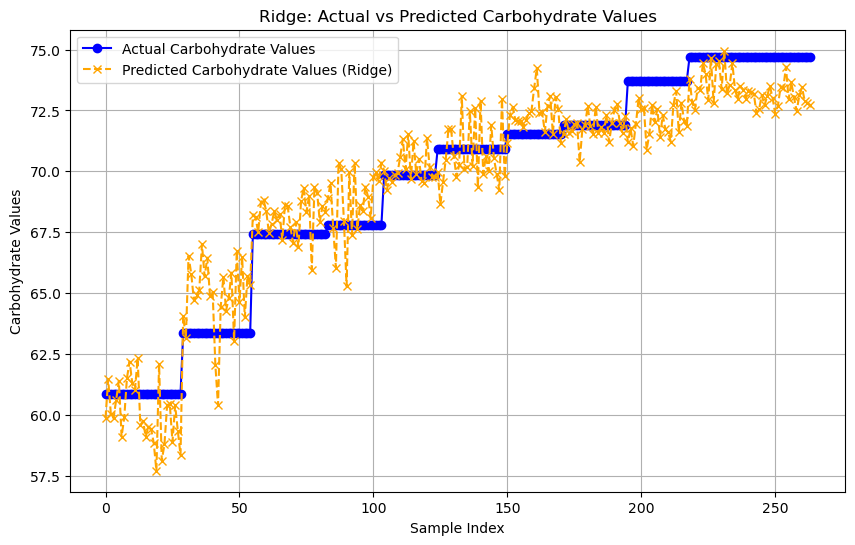

In [5]:
y_test_sorted_idx = y_test.argsort()
y_test_sorted = y_test.iloc[y_test_sorted_idx].reset_index(drop=True)
y_pred_sorted = pd.Series(y_pred_ridge).iloc[y_test_sorted_idx].reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label='Actual Carbohydrate Values', color='blue', marker='o')
plt.plot(y_pred_sorted, label='Predicted Carbohydrate Values (Ridge)', color='orange', linestyle='dashed', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Carbohydrate Values')
plt.title('Ridge: Actual vs Predicted Carbohydrate Values')
plt.legend()
plt.grid(True)
plt.show()